In [1]:
import pandas as pd

In [2]:
url = url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df = df.drop(columns='Cabin')

In [8]:
df = df.dropna(subset='Embarked')
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Visualize the data first

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Pclass', ylabel='count'>

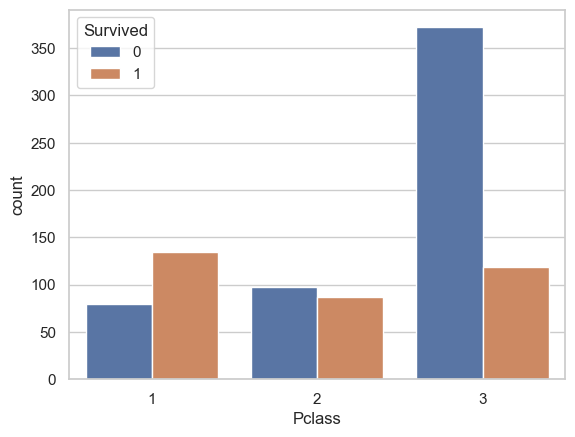

In [13]:
sns.set(style='whitegrid')
sns.countplot(x='Pclass', hue='Survived', data=df)

Text(0.5, 1.0, 'Survival Count by Sex')

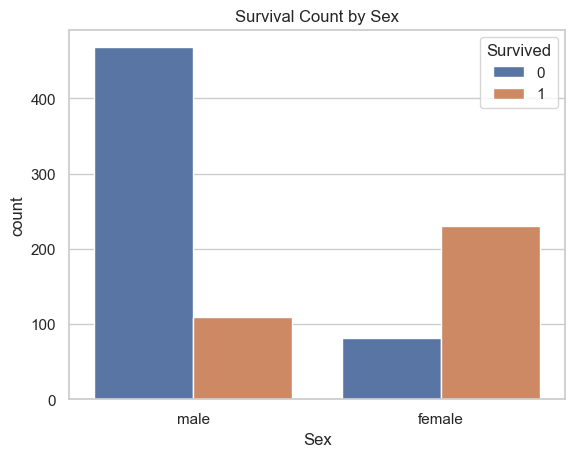

In [14]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')

Text(0.5, 1.0, 'Age Distribution by Survival')

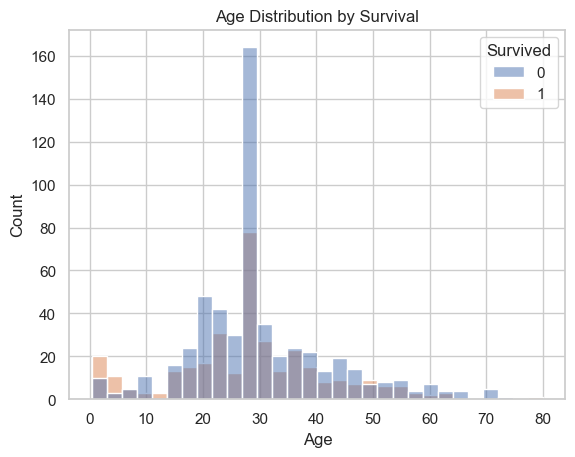

In [16]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30)
plt.title('Age Distribution by Survival')

Text(0.5, 1.0, 'Survival Count by Siblings/Spouses Aboard')

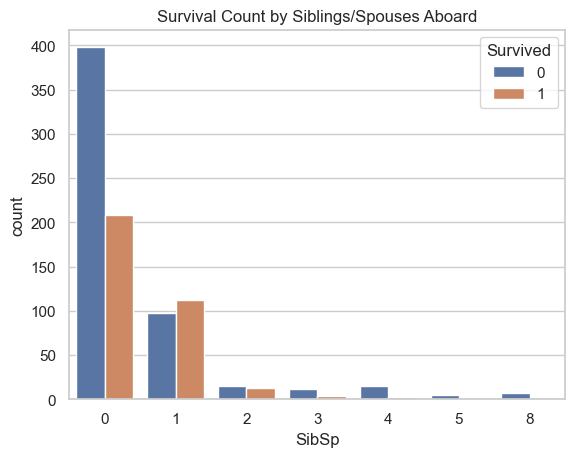

In [20]:
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('Survival Count by Siblings/Spouses Aboard')

Text(0.5, 1.0, 'Survival Count by Parents/Children Aboard')

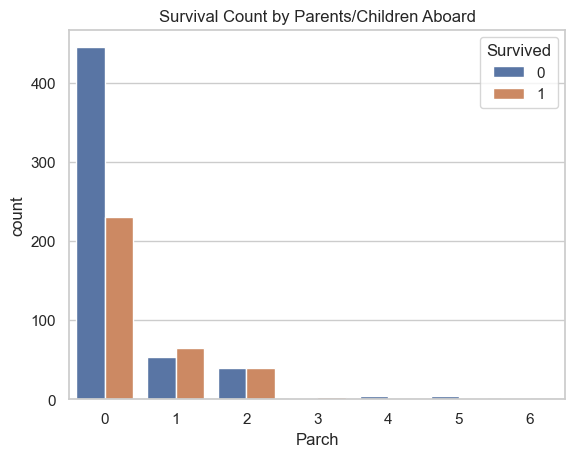

In [21]:
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Survival Count by Parents/Children Aboard')

Text(0.5, 1.0, 'Fare Distribution by Survival')

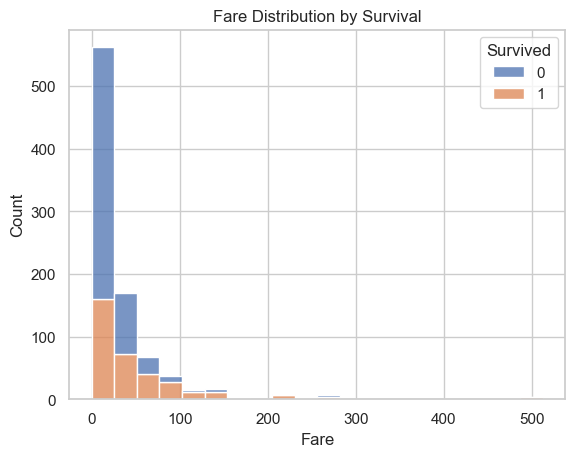

In [ ]:
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', bins=20)
plt.title('Fare Distribution by Survival')

Text(0.5, 1.0, 'Survival Count by Port of Embarkation')

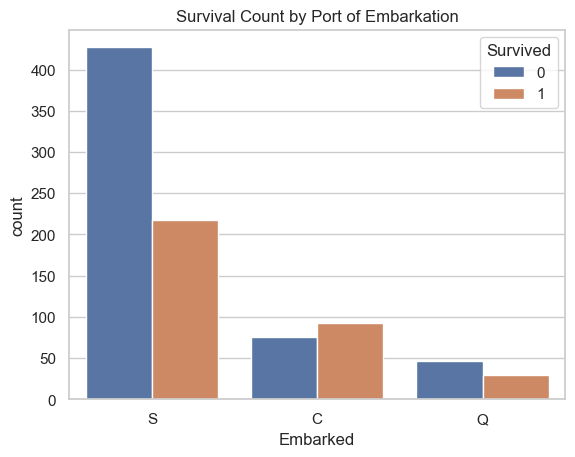

In [27]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Port of Embarkation')

Prepare Data and Train Model

In [17]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = ['Survived']

In [18]:
X = df[features]
y = df[target]

In [28]:
X.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

Use one hot encoding for Sex and Embarked

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define categorical and numeric columns
categorical = ['Sex', 'Embarked']
numeric = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical)
    ],
    remainder='passthrough'  # Keep numeric columns as they are
)


ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(), ['Sex', 'Embarked'])])

Craete Pipeline + Split data

In [31]:
# Full pipeline: preprocessing + logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=100))
])

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Train the model
pipeline.fit(X_train, y_train)

/Volumes/NIKHILESH/PROJECTS/Data Science/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Volumes/NIKHILESH/PROJECTS/Data Science/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Volumes/NIKHILESH/PROJECTS/Data Science/.venv/lib/python3.9/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the co

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression())])

EVALUATE THE MODEL

In [33]:
# test model
y_pred = pipeline.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy: .2f}')

Accuracy Score:  0.78


In [38]:
# classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       109
           1       0.70      0.75      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



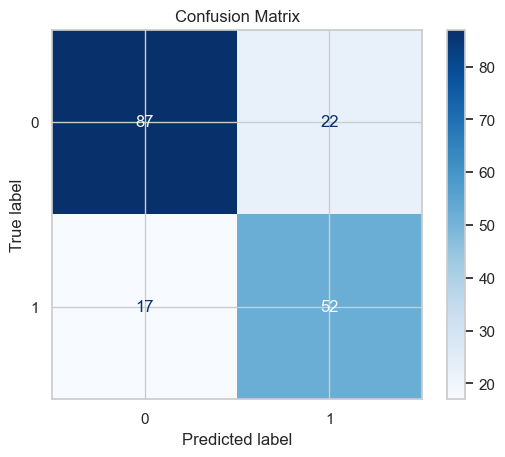

In [39]:
#Confusion Metrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

SAVE THE PIPELINE

In [42]:
import joblib
# Save the full pipeline to a file
joblib.dump(pipeline, "titanic_model_pipeline.pkl")

['titanic_model_pipeline.pkl']

Load the saved pipeline

In [43]:
loaded_pipeline = joblib.load("titanic_model_pipeline.pkl")
loaded_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression())])

Try predicting on a new row of data

In [58]:
# Example passenger
new_passenger = pd.DataFrame([{
    'Pclass': 3,
    'Sex': 'male',
    'Age': 22,
    'SibSp': 1,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked': 'S'
}])

# Predict survival
prediction = loaded_pipeline.predict(new_passenger)
print("Prediction:", prediction[0])  # 0 = did not survive, 1 = survived

Prediction: 0
